Ingresa el numero de juegos a simular:  10000


Victorias: [0, 0, 0, 252, 425, 645, 1636, 652, 435, 272, 567, 0, 0]
Derrotas: [0, 303, 535, 0, 0, 0, 3992, 0, 0, 0, 0, 286, 0]
Probabilidad de ganar: 0.4884
Media de duración de los juegos: 3.4059
Mediana de duración de los juegos: 2.0
Moda de duración de los juegos: 1
Probabilidades de ganar para cada tirada: [0, 0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.2906894100923952, 1.0, 1.0, 1.0, 1.0, 0.0, 0]


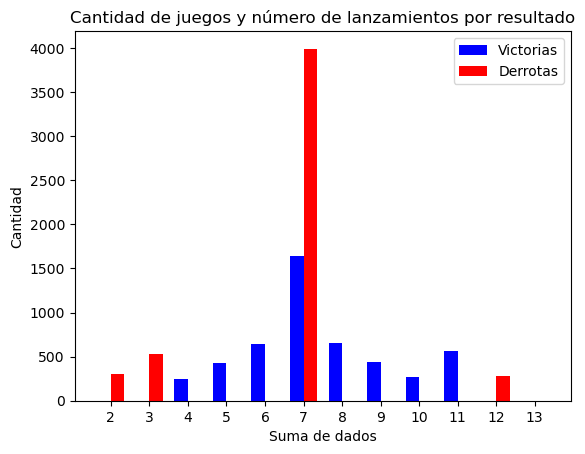

In [11]:
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

victorias = [0] * 14
derrotas = [0] * 14
lanzamientos_por_juego = []

numero_juegos = int(input("Ingresa el numero de juegos a simular: "))

def lanzar_dado():
    dado1 = random.randint(1, 6)
    dado2 = random.randint(1, 6)
    return dado1 + dado2

for i in range(numero_juegos):
    suma_de_dados = lanzar_dado()
    lanzamientos = 1

    if suma_de_dados in (7, 11): 
        victorias[suma_de_dados] += 1
    elif suma_de_dados in (2, 3, 12): 
        derrotas[suma_de_dados] += 1
    else: 
        mi_punto = suma_de_dados
        while True:
            lanzamientos += 1
            suma_de_dados = lanzar_dado()
            if suma_de_dados == mi_punto: 
                victorias[suma_de_dados] += 1
                break
            elif suma_de_dados == 7:
                derrotas[suma_de_dados] += 1
                break
    lanzamientos_por_juego.append(lanzamientos)

probabilidad_ganar = sum(victorias) / (sum(victorias) + sum(derrotas))
media_duracion = np.mean(lanzamientos_por_juego)
mediana_duracion = np.median(lanzamientos_por_juego)
moda_duracion = np.argmax(np.bincount(lanzamientos_por_juego))
probabilidades_ganar = [v / (v + d) if (v + d) != 0 else 0 for v, d in zip(victorias, derrotas)]

print('Victorias:', victorias[1:])
print('Derrotas:', derrotas[1:])
print('Probabilidad de ganar:', probabilidad_ganar)
print('Media de duración de los juegos:', media_duracion)
print('Mediana de duración de los juegos:', mediana_duracion)
print('Moda de duración de los juegos:', moda_duracion)
print('Probabilidades de ganar para cada tirada:', probabilidades_ganar)

x = np.arange(2, 14)
width = 0.35

fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, victorias[2:], width, label='Victorias', color='blue')
bar2 = ax.bar(x + width/2, derrotas[2:], width, label='Derrotas', color='red')

ax.set_xlabel('Numero de lanzamientos')
ax.set_ylabel('Cantidad de juegos')
ax.set_title('Resultados de los juegos de dardos')
ax.set_xticks(x)
ax.legend()
plt.show()